# xarray

## 基础逻辑

### 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import seaborn as sns
from mpl_toolkits.basemap import Basemap,addcyclic,shiftgrid

In [24]:
ds2 = xr.open_dataset('D:\Desktop\data310\data2019_200hpa_Geop.nc')
lon=ds2['longitude']
lat=ds2['latitude']
z=ds2['z'].mean(dim='time')/9.8
z

<xarray.DataArray 'z' (latitude: 721, longitude: 1440)>
array([[11272.311, 11272.311, 11272.311, ..., 11272.311, 11272.311,
        11272.311],
       [11273.195, 11273.195, 11273.201, ..., 11273.208, 11273.208,
        11273.201],
       [11274.098, 11274.106, 11274.094, ..., 11274.11 , 11274.115,
        11274.107],
       ...,
       [10786.998, 10786.992, 10786.989, ..., 10787.021, 10787.016,
        10787.006],
       [10786.633, 10786.629, 10786.629, ..., 10786.636, 10786.637,
        10786.63 ],
       [10786.316, 10786.316, 10786.316, ..., 10786.316, 10786.316,
        10786.316]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

Text(0.5, 1.0, 'GeoAxes')

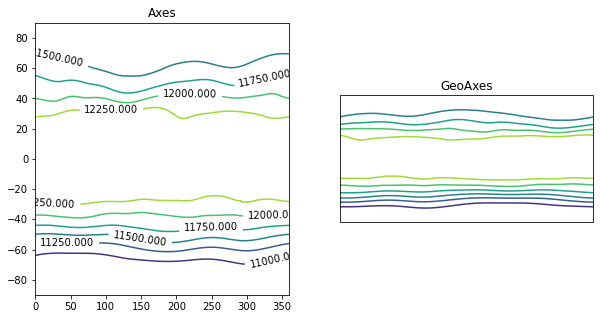

In [34]:
fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(1,2,1)
c1 = ax1.contour(lon,lat,z)
ax1.clabel(c1,fontsize=10,colors='k')
ax1.set_title('Axes')
ax2 = plt.subplot(1,2,2,projection=ccrs.PlateCarree())

c2 = ax2.contour(lon,lat,z,transform=ccrs.PlateCarree())
ax2.set_title('GeoAxes')

NameError: name 'lon_ds1' is not defined

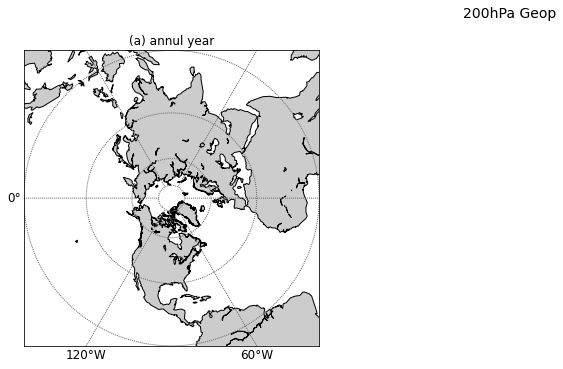

In [31]:
# 2021年200ha位势高度图
#创建map,地图投影库，cyl投影方式，
map = Basemap(projection='npstere',boundinglat=0,lon_0=270)

#创建画布，命名。
fig=plt.figure(figsize=(18,18))
fig.suptitle('200hPa Geop',fontsize=14,x=0.5,y=0.65)
# 在画布上绘制子图，划分为3行一列，选中图1，命名。
ax1=fig.add_subplot(131)
ax1.set_title('(a) annul year')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x3,y3 = map(lons, lats)
clevs=np.linspace(0,10,11)
cs1=map.contourf(x3,y3,z_annual_ds2,cmap='jet',extend='both')

ax2=fig.add_subplot(132)
ax2.set_title('(b) DJF')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x3,y3 = map(lons, lats)
clevs=np.linspace(0,10,11)
cs2=map.contourf(x3,y3,z_DJFmean_ds2,cmap='jet',extend='both')

ax3=fig.add_subplot(133)
ax3.set_title('(c) JJA')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x3,y3 = map(lons, lats)
clevs=np.linspace(0,10,11)
cs3=map.contourf(x3,y3,z_JJAmean_ds2,cmap='jet',extend='both')
cb_ax = fig.add_axes([0.2, 0.35, 0.6, 0.01])
cbar = fig.colorbar(cs1, cax=cb_ax, orientation='horizontal')
fig.savefig('200hpaGrop.pdf',dpi=300,bbox_inches='tight')